# Data Wrangling Project
#### WeRateDogs Twitter Data - by Kevin Foong
## Table of Contents
1. [Gather](#gather)
2. [Assess](#assess)
3. [Clean](#clean)
4. [Analysis](#analysis)

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import re
from timeit import default_timer as timer
import matplotlib.pyplot as plt

%matplotlib inline

<a id="gather"></a> 
## 1. Gather 

In [2]:
#read in csv file
df_arc = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#file hosted on udacity server
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#file downloaded in memory
response=requests.get(url)

#open file to write to. wb is write binary
with open(url.split('/')[-1],mode='wb') as file:
    file.write(response.content)

In [3]:
df_img = pd.read_csv('image-predictions.tsv',sep='\t')

In [5]:
#connect to twitter using API
consumer_key = 'blanked'
consumer_secret = 'blanked'
access_token = 'blanked'
access_secret = 'blanked'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for index, row in df_archive.iterrows():
        count += 1
        print(str(count) + ": " + str(row.tweet_id))
        try:
            tweet = api.get_status(row.tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[row.tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [4]:
#read file into dataframe
with open('tweet_json.txt',mode='r') as file:
    tweet_data = []
    for row in file:
        row_dict = json.loads(row)
        tweet_data.append({'tweet_id' : row_dict['id_str'],
                        'retweet_count' : row_dict['retweet_count'],
                        'favorite_count' : row_dict['favorite_count']
                      })
        
df_add = pd.DataFrame(tweet_data)


<a id="assess"></a> 
## 2. Assess 

In [14]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
df_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
#Take a look at rating_numerator spread
df_arc.rating_numerator.value_counts().sort_index(ascending=False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [17]:
#Take a look at rating_denominator spread
df_arc.rating_denominator.value_counts().sort_index(ascending=False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
#looks like some of the wacky ratings are actually what users entered so we keep it .. but maybe not the 0?
df_arc.loc[df_arc.rating_numerator/df_arc.rating_denominator > 5, ['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10...,420,10
189,855860136149123072,@s8n You tried very hard to portray this good ...,666,10
290,838150277551247360,@markhoppus 182/10,182,10
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75,10
979,749981277374128128,This is Atticus. He's quite simply America af....,1776,10
2074,670842764863651840,After so many requests... here you go.\n\nGood...,420,10


In [19]:
#no that one is ok too
a = df_arc.loc[df_arc['rating_denominator']==0,'text']
dict(a)

{313: "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"}

In [20]:
#Is doggo so the other dog stages should be None but they are not
df_arc.loc[(df_arc['doggo']!='None') & ((df_arc['floofer']!='None') | (df_arc['pupper']!='None') | (df_arc['puppo']!='None')),['tweet_id','doggo','floofer','pupper','puppo']]

,tweet_id,doggo,floofer,pupper,puppo
191,855851453814013952,doggo,None,None,puppo
200,854010172552949760,doggo,floofer,None,None
460,817777686764523521,doggo,None,pupper,None
531,808106460588765185,doggo,None,pupper,None
565,802265048156610565,doggo,None,pupper,None
575,801115127852503040,doggo,None,pupper,None
705,785639753186217984,doggo,None,pupper,None
733,781308096455073793,doggo,None,pupper,None
778,775898661951791106,doggo,None,pupper,None
822,770093767776997377,doggo,None,pupper,None


In [21]:
#Is pupper so the other dog stages should be None but they are not
df_arc.loc[(df_arc['pupper']!='None') & ((df_arc['floofer']!='None') | (df_arc['doggo']!='None') | (df_arc['puppo']!='None')),['tweet_id','doggo','floofer','pupper','puppo']]

,tweet_id,doggo,floofer,pupper,puppo
460,817777686764523521,doggo,None,pupper,None
531,808106460588765185,doggo,None,pupper,None
565,802265048156610565,doggo,None,pupper,None
575,801115127852503040,doggo,None,pupper,None
705,785639753186217984,doggo,None,pupper,None
733,781308096455073793,doggo,None,pupper,None
778,775898661951791106,doggo,None,pupper,None
822,770093767776997377,doggo,None,pupper,None
889,759793422261743616,doggo,None,pupper,None
956,751583847268179968,doggo,None,pupper,None


In [22]:
#Is floofer so the other dog stages should be None but they are not
df_arc.loc[(df_arc['floofer']!='None') & ((df_arc['pupper']!='None') | (df_arc['doggo']!='None') | (df_arc['puppo']!='None')),['tweet_id','doggo','floofer','pupper','puppo']]

,tweet_id,doggo,floofer,pupper,puppo
200,854010172552949760,doggo,floofer,None,None


In [23]:
#Is puppo so the other dog stages should be None but they are not
df_arc.loc[(df_arc['puppo']!='None') & ((df_arc['pupper']!='None') | (df_arc['doggo']!='None') | (df_arc['floofer']!='None')),['tweet_id','doggo','floofer','pupper','puppo']]

,tweet_id,doggo,floofer,pupper,puppo
191,855851453814013952,doggo,None,None,puppo


In [24]:
#convert value_counts of name into dictionary so we can more easily iterate
names = dict(df_arc.name.value_counts())

In [25]:
#iterate through dictionary and display if it is lower case
#doesn't look like dog names
for key, value in names.items():
    if key[0].islower():
        print(key,value)

a 55
the 8
an 7
very 5
one 4
just 4
quite 4
not 2
mad 2
getting 2
actually 2
light 1
by 1
such 1
my 1
old 1
life 1
this 1
unacceptable 1
space 1
his 1
infuriating 1
officially 1
all 1
incredibly 1


In [27]:
df_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [117]:
#check validity of expanded_urls
#I notice alot of https so we search for anything not beginning with https
df_arc[~df_arc['expanded_urls'].str.startswith('https',na=True)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
204,852936405516943360,NaN,NaN,2017-04-14 17:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I usually only share these on F...,8.316501e+17,4.196984e+09,2017-02-14 23:43:18 +0000,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I usually only share these on Friday's, but th...",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
391,826204788643753985,NaN,NaN,2017-01-30 23:05:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Here's a little more info on Dew, your favorit...",NaN,NaN,NaN,http://us.blastingnews.com/news/2017/01/kentuc...,13,10,None,doggo,None,None,None
444,819238181065359361,NaN,NaN,2017-01-11 17:42:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Some happy pupper news to share. 10/10 for eve...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/01/200-do...,10,10,None,None,None,pupper,None
1265,709901256215666688,NaN,NaN,2016-03-16 00:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",WeRateDogs stickers are here and they're 12/10...,NaN,NaN,NaN,"http://goo.gl/ArWZfi,https://twitter.com/dog_r...",12,10,None,None,None,None,None


In [29]:
#Check if any text are empty
df_arc.text.isnull().sum()

0

In [30]:
#Look at a sample of text descriptions
#Looks like url's are in the description
text = df_arc.text.sample(20)
dict(text)

{2108: "This dog can't see its haters. 11/10 https://t.co/35BcGFdEAK",
 1343: 'This pupper killed this great white in an epic sea battle. Now wears it as a trophy. Such brave. Much fierce. 13/10 https://t.co/Lu0ECu5tO5',
 1783: 'Endangered triangular pup here. Could be a wizard. Caught mid-laugh. No legs. Just fluff. Probably a wizard. 9/10 https://t.co/GFVIHIod0Z',
 1576: "This is Kramer. He's a Picasso Tortellini. Tie couldn't be more accurate. Confident af. Runs his own business. 10/10 https://t.co/jIcVW0xxmH",
 1754: 'This is Linda. She fucking hates trees. 7/10 https://t.co/blaY85FIxR',
 231: 'RT @basic_vacek_: I love my new mug easy 13/10 @dog_rates https://t.co/0bYtoL7Wwt',
 863: 'Meet Glenn. Being in public scares him. Frighteningly relatable. 12/10 keep hangin in there Glenn (Imgur - Wuhahha) https://t.co/pA4MDKwRci',
 1330: 'Seriously, add us 🐶 11/10 for sad wet pupper https://t.co/xwPE9faVZR',
 308: 'This is Eli. He works backstage at Bone Jovi concerts. Heavy duty earmuffs 

In [31]:
#Take a look at source
df_arc.source.sample(20)

927     <a href="http://twitter.com/download/iphone" r...
405     <a href="http://twitter.com/download/iphone" r...
2032    <a href="http://twitter.com/download/iphone" r...
2290    <a href="http://twitter.com/download/iphone" r...
1588    <a href="http://twitter.com/download/iphone" r...
1334    <a href="http://twitter.com/download/iphone" r...
622     <a href="http://twitter.com/download/iphone" r...
1291    <a href="http://twitter.com/download/iphone" r...
972     <a href="https://about.twitter.com/products/tw...
431     <a href="http://twitter.com/download/iphone" r...
2172    <a href="http://twitter.com/download/iphone" r...
910     <a href="http://twitter.com/download/iphone" r...
2253    <a href="http://twitter.com/download/iphone" r...
1817    <a href="http://twitter.com/download/iphone" r...
540     <a href="http://twitter.com/download/iphone" r...
448     <a href="http://twitter.com/download/iphone" r...
1382    <a href="http://twitter.com/download/iphone" r...
936     <a hre

In [32]:
#There are only 4 different sources
df_arc.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [118]:
#Take a look at reply_to_status
df_arc[df_arc.in_reply_to_status_id.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [34]:
#check if any tweet_id is not equal to 18 characters. Looks ok
df_arc[df_arc['tweet_id'].apply(lambda x: len(str(x))!=18)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [35]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
#check if tweet_id is not equal to 18 characters. Looks ok
df_img[df_img['tweet_id'].apply(lambda x: len(str(x))!=18)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [37]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [38]:
df_img.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [39]:
#See spread of p1
df_img.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
teddy                         18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [40]:
#Take a look at those that are not a dog
df_img.loc[df_img['p1_dog']==False,['p1','p1_dog']]

,p1,p1_dog
6,box_turtle,False
8,shopping_cart,False
17,hen,False
18,desktop_computer,False
21,three-toed_sloth,False
22,ox,False
25,guinea_pig,False
29,coho,False
33,llama,False
43,seat_belt,False


In [41]:
#tweet_id is string not int like the others
df_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
tweet_id          2342 non-null object
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


In [42]:
df_add.head()

,favorite_count,retweet_count,tweet_id
0,38176,8353,892420643555336193
1,32741,6171,892177421306343426
2,24649,4084,891815181378084864
3,41507,8491,891689557279858688
4,39679,9190,891327558926688256


In [43]:
#check if tweet_id is not equal to 18 characters. Looks ok
df_add[df_add['tweet_id'].apply(lambda x: len(str(x))!=18)]

,favorite_count,retweet_count,tweet_id


### Quality issues
#### Twitter Enhanced Archive table
* Expanded url have some missing values
* Timestamp column has an extra "+0000". It should be datetime object not string.
* There are some dogs at more than 1 stage (eg. doggo and pupper together) which is not possible.
* Some dog names have "None" instead of NaN. Same with doggo, floofer, pupper and puppo.
* Dog names starting with lower case doesn't appear to be dog names like a, by, his
* There are some dog names that are garbled like FrÃ¶nq and AmÃ©lie
* Text contains the shortened url at the end. As the expanded url has already been extracted and the shortened url is not actually part of what the user entered we should remove them.
* The following fields should all be int not float:
    * in_reply_to_status_id
    * in_reply_to_user_id
    * retweeted_status_id
    * retweeted_status_timestamp
    
(*Note upon further research, Python does not support int when some values are NaN so we will leave these as float)
* File contains retweet values. We only want original tweets.
* There are a few ratings that are extreme (eg. 1776/10), and there is one with denominator 0 which is not mathematically possible (ie. 960/0).

#### Image Predictions table
* The dog descriptions are not consistent. For example some start with captial letters and some don't. Also they contain underscores. 

#### Tweet JSON table
* Tweet id is a string, it should be an int

### Tidiness issues
* doggo, floofer, pupper, puppo columns can be combined into one column dog_stages in the Twitter enhanced table.
* This Tweet JSON table should be merged with the Twitter enhanced table.

<a id="clean"></a>
## 3. Clean

In [5]:
#make a copy, this will be our clean master copy
df_clean = df_arc.copy()

### Define
* Convert tweet_id from the JSON table from string to int
* Merge the JSON table to the master table

### Code & Test

In [6]:
#convert tweet_id to int
df_add.tweet_id = df_add.tweet_id.apply(int)

In [7]:
df_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
tweet_id          2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [8]:
#before the merge
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
#merge master table with json table on tweet_id, using an outer join
df_clean = df_clean.merge(df_add, left_on='tweet_id', right_on='tweet_id', how='outer')

In [10]:
#after the merge
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_count                23

### Define
* For the dog stages (doggo, floofer, pupper, puppo) replace all None with NaN
* Where there are more than one dog stage per dog, remove values (replace with NaN) - because we can't be sure which one is correct we will just remove them.
* Replace doggo, floofer, pupper, puppo with one column dog_stage

### Code & Test

In [11]:
#Replace string None with NaN
df_clean['doggo'].replace('None',np.nan,inplace=True)
df_clean['floofer'].replace('None',np.nan,inplace=True)
df_clean['pupper'].replace('None',np.nan,inplace=True)
df_clean['puppo'].replace('None',np.nan,inplace=True)

In [12]:
#Values should now be NaN
#These are all the records with more than one dog stage.
df_clean.loc[(df_clean['doggo'].notnull()) & ((df_clean['floofer'].notnull()) | (df_clean['pupper'].notnull()) | (df_clean['puppo'].notnull())),['tweet_id','doggo','floofer','pupper','puppo']]

,tweet_id,doggo,floofer,pupper,puppo
191,855851453814013952,doggo,NaN,NaN,puppo
200,854010172552949760,doggo,floofer,NaN,NaN
460,817777686764523521,doggo,NaN,pupper,NaN
531,808106460588765185,doggo,NaN,pupper,NaN
565,802265048156610565,doggo,NaN,pupper,NaN
575,801115127852503040,doggo,NaN,pupper,NaN
705,785639753186217984,doggo,NaN,pupper,NaN
733,781308096455073793,doggo,NaN,pupper,NaN
778,775898661951791106,doggo,NaN,pupper,NaN
822,770093767776997377,doggo,NaN,pupper,NaN


In [14]:
#save into temporary dataframe just those rows with more than one dog stage
make_null = df_clean.loc[(df_clean['doggo'].notnull()) & ((df_clean['floofer'].notnull()) | (df_clean['pupper'].notnull()) | (df_clean['puppo'].notnull())),['tweet_id']]

#iterate through dataframe and set to NaN
for index, row in make_null.iterrows():
    df_clean.loc[df_clean['tweet_id']==row.tweet_id,['doggo','floofer','pupper','puppo']] = np.nan

In [15]:
#Check results again - should be empty
df_clean.loc[(df_clean['doggo'].notnull()) & ((df_clean['floofer'].notnull()) | (df_clean['pupper'].notnull()) | (df_clean['puppo'].notnull())),['tweet_id','doggo','floofer','pupper','puppo']]

,tweet_id,doggo,floofer,pupper,puppo


In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         83 non-null object
floofer                       9 non-null object
pupper                        245 non-null object
puppo                         29 non-null object
favorite_count                2342 non-n

In [17]:
#just get a subset of the data
df_tmp = df_clean.loc[:,['tweet_id','doggo','floofer','pupper','puppo']]

In [18]:
df_tmp.head()

,tweet_id,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,NaN,NaN


In [19]:
#melt dataframe, create new dog_stage column
df_tmp = pd.melt(df_tmp,id_vars='tweet_id',value_vars=['doggo','floofer','pupper','puppo'],var_name='var',value_name='dog_stage')

In [20]:
#check to see that 4 rows created for 1 tweet_id. 
df_tmp[df_tmp['tweet_id']==892420643555336193]

,tweet_id,var,dog_stage
0,892420643555336193,doggo,NaN
2356,892420643555336193,floofer,NaN
4712,892420643555336193,pupper,NaN
7068,892420643555336193,puppo,NaN


In [21]:
#only keep if dog_stage is not null because we will merge this to our clean master
df_tmp.drop('var',axis=1,inplace=True)
df_tmp = df_tmp[df_tmp.dog_stage.notnull()]

In [22]:
#check value coungs
df_tmp.dog_stage.value_counts()

pupper     245
doggo       83
puppo       29
floofer      9
Name: dog_stage, dtype: int64

In [23]:
#merge to clean master using tweet id as the key on the two dataframes
df_clean = df_clean.merge(df_tmp,left_on='tweet_id',right_on='tweet_id',how='outer')

In [24]:
#check to see that dog_stage is created
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         83 non-null object
floofer                       9 non-null object
pupper                        245 non-null object
puppo                         29 non-null object
favorite_count                2342 non-n

In [25]:
#drop the 4 columns
df_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [119]:
#check the results
df_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage
328,833722901757046785,NaN,NaN,2017-02-20 17:00:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Bronte. She's fairly h*ckin aerodynami...,https://twitter.com/dog_rates/status/833722901...,13,10,Bronte,21833.0,3470.0,NaN
1923,674082852460433408,NaN,NaN,2015-12-08 04:27:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sagitariot Baklava mix. Loves her ne...,https://twitter.com/dog_rates/status/674082852...,11,10,NaN,776.0,177.0,NaN
92,874296783580663808,NaN,NaN,2017-06-12 16:06:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,https://twitter.com/dog_rates/status/874296783...,13,10,Jed,25729.0,4069.0,pupper
2191,668955713004314625,NaN,NaN,2015-11-24 00:54:05,"<a href=""http://twitter.com/download/iphone"" r...",This is a Slovakian Helter Skelter Feta named ...,https://twitter.com/dog_rates/status/668955713...,10,10,NaN,286.0,74.0,NaN
750,779123168116150273,NaN,NaN,2016-09-23 01:00:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Reggie. He hugs everyone he meets. 12/...,https://twitter.com/dog_rates/status/779123168...,12,10,Reggie,12635.0,3987.0,NaN
192,855818117272018944,NaN,NaN,2017-04-22 16:18:34,"<a href=""http://twitter.com/download/iphone"" r...",I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,https://twitter.com/markhalperin/status/855656...,13,10,NaN,27097.0,5616.0,NaN
1372,702217446468493312,NaN,NaN,2016-02-23 19:44:20,"<a href=""http://twitter.com/download/iphone"" r...","I know it's tempting, but please stop sending ...",https://twitter.com/dog_rates/status/702217446...,9,10,NaN,5052.0,1431.0,NaN
1733,679777920601223168,NaN,NaN,2015-12-23 21:37:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,https://twitter.com/dog_rates/status/679777920...,10,10,Rinna,3233.0,1196.0,pupper
1247,711652651650457602,NaN,NaN,2016-03-20 20:36:28,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He just wanted to say hi. 9/10 v...,https://twitter.com/dog_rates/status/711652651...,9,10,Gary,4054.0,979.0,NaN
2252,667801013445750784,NaN,NaN,2015-11-20 20:25:43,"<a href=""http://twitter.com/download/iphone"" r...",OMIGOD 12/10,https://twitter.com/dog_rates/status/667801013...,12,10,NaN,333.0,97.0,NaN


### Define
* Remove "+0000" from timestamp and retweeted_status_timestamp and convert to datetime object

### Code & Test

In [27]:
#Before
df_clean.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [28]:
#Delete +0000 - by keeping everything only up to last space
df_clean.timestamp = df_clean.timestamp.str.extract(r'(^.+[\s])')

In [29]:
#Check results
df_clean.timestamp.head()

0    2017-08-01 16:23:56 
1    2017-08-01 00:17:27 
2    2017-07-31 00:18:03 
3    2017-07-30 15:58:51 
4    2017-07-29 16:00:24 
Name: timestamp, dtype: object

In [30]:
#Convert to datetime object
df_clean.timestamp = pd.to_datetime(df_clean.timestamp, format='%Y-%m-%d %H:%M:%S')

In [31]:
#Check to make sure data is ok
df_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [32]:
#Check to make sure object is now datetime
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
favorite_count                2342 non-null float64
retweet_count                 2342 non-null float64
dog_stage                     366 non-null object
dtypes: datetime64[ns](1), float64(6), int64(3), object(6)
memory usage: 3

### Define
* Remove URL from end of the text

### Code & Test

In [33]:
#Convert to dict so we can see the whole text. This is what it looks like before
txt = df_clean.text.head(5)
dict(txt)

{0: "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 1: "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 2: 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
 3: 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ',
 4: 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f'}

In [34]:
#Extract everything up tp the last space. ?=\s looks ahead to the space character but does not include it
df_clean.text = df_clean.text.str.extract(r'(^.+)(?=\s)')

In [35]:
#Check the results
txt = df_clean.text.head(5)
dict(txt)

{0: "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10",
 1: "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",
 2: 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10',
 3: 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us',
 4: 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek'}

### Define
* Convert dog names that are 'None' to NaN
* Names that are in lower case are probably not names, so amend these to NaN
* Names that are non alpha-numeric like FrÃ¶nq and AmÃ©lie, remove them

### Code & Test

In [36]:
df_clean.name.sample(10)

1238       None
231        None
2212        the
314        None
2095    Vincent
206       Aspen
2331       None
1058       None
44         Noah
1426     Carter
Name: name, dtype: object

In [37]:
#Number of names equal to 'None' before
df_clean[df_clean['name']=='None'].name.count()

745

In [38]:
#Replace string None with NaN
df_clean['name'].replace('None',np.nan,inplace=True)

In [39]:
#Number of names equal to 'None' after
df_clean[df_clean['name']=='None'].name.count()

0

In [40]:
#Part 2 - number of names starting with lower case before
df_clean['name'].str.count(r'^[a-z].*').sum()

109.0

In [41]:
#convert all lower case names to NaN
def make_lower(x):
    if not pd.isnull(x):
        if x.islower():
            x = np.nan
    return x

df_clean.name = df_clean.name.apply(make_lower)

In [42]:
#number of names starting with lower case after
df_clean['name'].str.count(r'^[a-z].*').sum()

0.0

In [43]:
df_clean['name'].sample(20)

1348    Ralphson
1096        Rory
1437      Oakley
2226      Sophie
1819         NaN
1272      Walker
218          NaN
63         Romeo
1970         Eve
907      Leonard
1740      Dwight
1791         NaN
1694       Sarge
1609         NaN
65        Bailey
1420    Franklin
1845      Pepper
402          NaN
2327         NaN
1221       Blitz
Name: name, dtype: object

In [44]:
#count how many names have non alpha-numeric characters before
df_clean[df_clean.name.str.contains(r'^[A-Za-z0-9 ]+$') == False].name.count()

9

In [45]:
#Part 3 - if name contains non alpha-numeric characters then replace with NaN
def remove_garble(x):
    if not pd.isnull(x):
        if not re.match(r'^[A-Za-z0-9 ]+$',x):
            x = np.nan
    return x

df_clean.name = df_clean.name.apply(remove_garble)

In [46]:
#count again to check results
df_clean[df_clean.name.str.contains(r'^[A-Za-z0-9 ]+$') == False].name.count()

0

### Define
* In the Image Predictions table the type of dog ie. p1, p2 and p3, change to Title case and remove the underscores

### Code & Test


In [47]:
#Make a copy of the image predictions table
df_img_clean = df_img.copy()

In [48]:
#See what it looks like before
df_img_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [49]:
#Replace underscore with space and change to title case
df_img_clean.p1 = df_img_clean.p1.str.replace('_',' ').str.title()
df_img_clean.p2 = df_img_clean.p2.str.replace('_',' ').str.title()
df_img_clean.p3 = df_img_clean.p3.str.replace('_',' ').str.title()

In [50]:
#See results after
df_img_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [51]:
#Chack random sample
df_img_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
497,675798442703122432,https://pbs.twimg.com/media/CWDrGH4UYAARoq_.jpg,1,Beagle,0.681218,True,Basset,0.125121,True,Boxer,0.080398,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,Convertible,0.738995,False,Sports Car,0.139952,False,Car Wheel,0.044173,False
1351,759846353224826880,https://pbs.twimg.com/media/CouEOZhWAAAgFpE.jpg,1,Sussex Spaniel,0.355395,True,Vizsla,0.141094,True,Otterhound,0.092198,True
657,682303737705140231,https://pbs.twimg.com/media/CXgHoLnWAAA8i52.jpg,1,Seat Belt,0.997659,False,Lakeland Terrier,0.001731,True,Airedale,0.000204,True
1038,712065007010385924,https://pbs.twimg.com/media/CeHDV73W0AM5Cf8.jpg,1,Goose,0.214301,False,Gibbon,0.084253,False,Pizza,0.080168,False
1796,831322785565769729,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,1,Old English Sheepdog,0.999715,True,Tibetan Terrier,0.000046,True,Guinea Pig,0.000041,False
751,688064179421470721,https://pbs.twimg.com/media/CYx-tGaUoAAEXV8.jpg,1,Eskimo Dog,0.240602,True,Norwegian Elkhound,0.180369,True,Siberian Husky,0.090739,True
1646,808501579447930884,https://pbs.twimg.com/media/Czhf4XtVQAAIqpd.jpg,2,Airedale,0.454239,True,Cocker Spaniel,0.219323,True,Irish Terrier,0.093193,True
1656,810657578271330305,https://pbs.twimg.com/media/C0AIwgVXAAAc1Ig.jpg,1,Malamute,0.753521,True,Siberian Husky,0.166151,True,Eskimo Dog,0.069811,True
325,671882082306625538,https://pbs.twimg.com/media/CVMBL_LWUAAsvrL.jpg,1,Ski Mask,0.968325,False,Mask,0.021863,False,Abaya,0.005479,False


### Define
* Delete rows where retweeted_status_id has a value (we only want original tweets).
* When empty, remove columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

### Code & Test

In [52]:
#how many were retweeted
df_clean.retweeted_status_id.count()

181

In [53]:
#remove rows if the record is a retweet
df_clean.drop(df_clean[df_clean['retweeted_status_id'].notnull()].index, inplace=True)

In [54]:
#check again how many now retweeted
df_clean.retweeted_status_id.count()

0

In [55]:
#drop the 3 columns which are now empty
df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1,inplace=True)

In [56]:
#check to see columns have been dropped
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1382 non-null object
favorite_count           2174 non-null float64
retweet_count            2174 non-null float64
dog_stage                332 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 237.9+ KB


In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1382 non-null object
favorite_count           2174 non-null float64
retweet_count            2174 non-null float64
dog_stage                332 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 237.9+ KB


In [58]:
#Save csv copies of the cleaned files
df_clean.to_csv('twitter_archive_master.csv', index=False)
df_img_clean.to_csv('image_predict_master.csv', index=False)

<a id="analysis"></a>
## 4. Analysis

### Most and least favourited dog types

In [148]:
#merge twitter archive and image predict into one dataset
df_all = df_clean.merge(df_img_clean, left_on='tweet_id', right_on='tweet_id', how='outer')

In [149]:
df_all.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,...,1.0,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,...,2.0,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


In [150]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 0 to 2255
Data columns (total 24 columns):
tweet_id                 2256 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
name                     1382 non-null object
favorite_count           2174 non-null float64
retweet_count            2174 non-null float64
dog_stage                332 non-null object
jpg_url                  2075 non-null object
img_num                  2075 non-null float64
p1                       2075 non-null object
p1_conf                  2075 non-null float64
p1_dog                   2075 non-null object
p2                       2075 non-null object
p2_conf  

In [205]:
#make a copy
df_dogtype = df_all.copy()

#drop if favorite_count is NaN
df_dogtype.dropna(subset=['favorite_count'],inplace=True)

#Only include if confidence is >= 90% and if prediction is a dog
df_dogtype = df_dogtype[(df_dogtype['p1_conf']>=.9)&(df_dogtype['p1_dog']==True)]

#only include columns we need, and sort by most favourited
df_dogtype = df_dogtype.loc[:,['tweet_id','timestamp','favorite_count','p1','p1_conf','p1_dog','jpg_url']].sort_values(by=['favorite_count'],ascending=False)

In [206]:
#10 most favourited and what type of dog it is
df_dogtype.head(10)

,tweet_id,timestamp,favorite_count,p1,p1_conf,p1_dog,jpg_url
119,866450705531457537,2017-05-22 00:28:40,122320.0,French Bulldog,0.905334,True,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg
300,830583320585068544,2017-02-12 01:04:29,70754.0,Labrador Retriever,0.908703,True,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg
120,866334964761202691,2017-05-21 16:48:45,52625.0,Samoyed,0.984086,True,https://pbs.twimg.com/media/DAXXDQNXgAAoYQH.jpg
935,733109485275860992,2016-05-19 01:38:16,51593.0,Golden Retriever,0.945523,True,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg
12,889665388333682689,2017-07-25 01:55:32,47377.0,Pembroke,0.966327,True,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg
42,883482846933004288,2017-07-08 00:28:19,45212.0,Golden Retriever,0.943082,True,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
106,869772420881756160,2017-05-31 04:27:59,42167.0,Pembroke,0.980148,True,https://pbs.twimg.com/media/DBINZcxXgAQ-R6P.jpg
899,739544079319588864,2016-06-05 19:47:03,41710.0,Labrador Retriever,0.967397,True,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg
217,844704788403113984,2017-03-23 00:18:10,40413.0,Labrador Retriever,0.980213,True,https://pbs.twimg.com/media/C7j-hkSW0AIxCZC.jpg
92,872486979161796608,2017-06-07 16:14:40,40243.0,Pembroke,0.931861,True,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg


In [207]:
#10 least favourited and what type of dog it is
df_dogtype.tail(10)

,tweet_id,timestamp,favorite_count,p1,p1_conf,p1_dog,jpg_url
1966,669926384437997569,2015-11-26 17:11:11,384.0,Pomeranian,0.984231,True,https://pbs.twimg.com/media/CUwOfnDWcAIXryP.jpg
2115,667090893657276420,2015-11-18 21:23:57,336.0,Chihuahua,0.959514,True,https://pbs.twimg.com/media/CUH7oLuUsAELWib.jpg
2028,668627278264475648,2015-11-23 03:09:00,324.0,French Bulldog,0.965403,True,https://pbs.twimg.com/media/CUdw9thWsAA4mB9.jpg
2143,666421158376562688,2015-11-17 01:02:40,316.0,Blenheim Spaniel,0.906777,True,https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg
2097,667435689202614272,2015-11-19 20:14:03,307.0,Rottweiler,0.999091,True,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg
2034,668567822092664832,2015-11-22 23:12:44,250.0,Shih-Tzu,0.985649,True,https://pbs.twimg.com/media/CUc64knWoAkZt70.jpg
2070,667861340749471744,2015-11-21 00:25:26,245.0,Malamute,0.967275,True,https://pbs.twimg.com/media/CUS4WJ-UsAEJj10.jpg
1981,669567591774625800,2015-11-25 17:25:28,239.0,Chihuahua,0.980511,True,https://pbs.twimg.com/media/CUrIK1DWoAAhECq.jpg
2134,666691418707132416,2015-11-17 18:56:35,189.0,German Shepherd,0.975401,True,https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg
2147,666396247373291520,2015-11-16 23:23:41,166.0,Chihuahua,0.978108,True,https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg


In [153]:
#20 most favourited dog types
df_dogtype_top = df_dogtype.p1.head(20).value_counts(sort=True).rename_axis('p1').reset_index(name='counts')
df_dogtype_top.sort_values(by='counts',ascending=False)

,p1,counts
0,Labrador Retriever,5
1,Golden Retriever,3
2,Samoyed,3
3,Pembroke,3
4,French Bulldog,2
5,Blenheim Spaniel,1
6,Shetland Sheepdog,1
7,Pug,1
8,Pomeranian,1


In [154]:
#20 least favourited dog types
df_dogtype_bot = df_dogtype.p1.tail(20).value_counts(sort=True).rename_axis('p1').reset_index(name='counts')
df_dogtype_bot.sort_values(by='counts',ascending=False)

,p1,counts
0,Blenheim Spaniel,3
1,Chihuahua,3
2,Pomeranian,3
3,Golden Retriever,2
4,Shih-Tzu,2
5,West Highland White Terrier,1
6,Rottweiler,1
7,Malamute,1
8,Labrador Retriever,1
9,French Bulldog,1


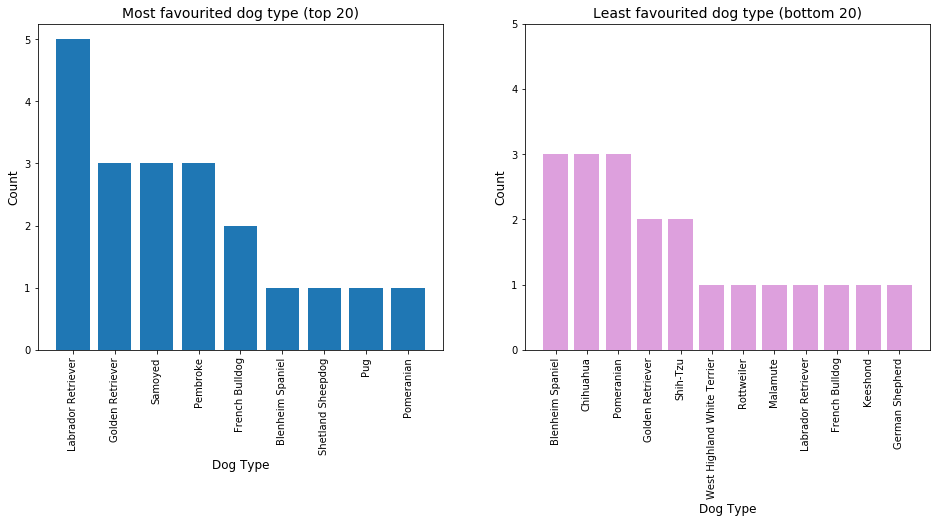

In [202]:
#Plot simple bar graph side by side most and least favourited dog types
fig=plt.figure(figsize=(16,6))

#get an ndarray from 0 to maximum value of both plots so that the ticks are even on both plots
if df_dogtype_top.counts.max() > df_dogtype_bot.counts.max():
    maxim = df_dogtype_top.counts.max()+1
else:
    maxim = df_dogtype_bot.counts.max()+1    
tick = np.arange(0,maxim,1)

#perform the plot
ax=fig.add_subplot(1,2,1)
ax.bar(df_dogtype_top.p1,height=df_dogtype_top.counts)
ax.set_xlabel('Dog Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Most favourited dog type (top 20)', fontsize=14)
ax.set_yticks(tick)
plt.xticks(rotation=90)

tb = np.arange(0,df_dogtype_bot.counts.max()+1,1)
ax2=fig.add_subplot(1,2,2)
ax2.bar(df_dogtype_bot.p1,height=df_dogtype_bot.counts,color='plum')
ax2.set_xlabel('Dog Type', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_title('Least favourited dog type (bottom 20)', fontsize=14)
ax2.set_yticks(tick)
plt.xticks(rotation=90)
plt.show()

### When did the tweets occur?

In [188]:
#make a copy
df_time = df_all.copy()

In [189]:
#Only keep the year, month, day in the timestamp
df_time['datestamp'] = df_time['timestamp'].apply(lambda x: x.replace(hour=0, minute=0, second=0, microsecond=0))

In [190]:
#Save value count of timestamp in a dataframe
df_time = df_time.datestamp.value_counts(sort=True).rename_axis('datestamp').reset_index(name='counts')

In [191]:
#check results
df_time.head()

,datestamp,counts
0,2015-11-29,26
1,2015-11-28,26
2,2015-11-16,25
3,2015-12-01,24
4,2015-11-19,23


In [192]:
#sort by datestamp
df_time = df_time.sort_values(by='datestamp').reset_index(drop=True)
df_time.head()

,datestamp,counts
0,2015-11-15,3
1,2015-11-16,25
2,2015-11-17,15
3,2015-11-18,18
4,2015-11-19,23


In [201]:
#we groupby the date per week, sum the counts so that when we plot it is smoother (weekly rather than daily)
df_time = df_time.groupby([pd.Grouper(key='datestamp',freq='W-MON')]).counts.sum().reset_index().sort_values('datestamp')
df_time.head()

,datestamp,counts
0,2015-11-16,28
1,2015-11-23,134
2,2015-11-30,138
3,2015-12-07,120
4,2015-12-14,111


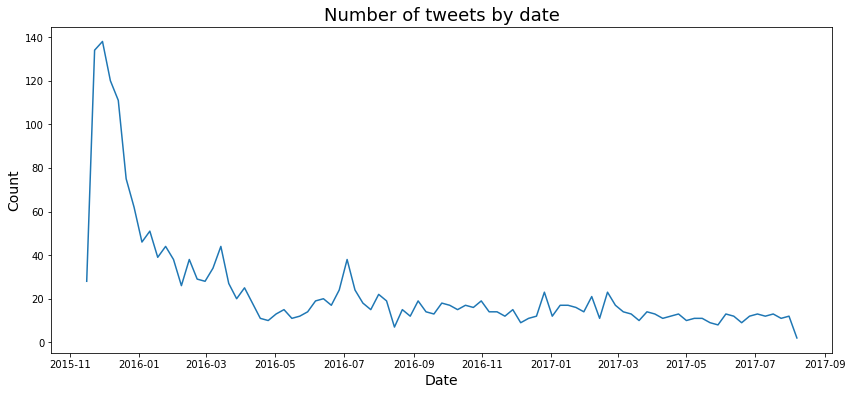

In [200]:
#This plot shows a timeline of when the tweets occurred
fig=plt.figure(figsize=(14,6))
ax=fig.add_subplot(1,1,1)
ax.plot(df_time.datestamp,df_time.counts)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Number of tweets by date', fontsize=18)
plt.show()

### Text of the highest retweet counts

In [72]:
#make a copy of the dataframe
df_retweet = df_all.copy()

In [208]:
#select only the columns we want and sort by retweeted_count, save into dataframe
retweet = df_retweet.loc[:,['retweet_count','text','rating_numerator','rating_denominator','jpg_url']].sort_values(by=['retweet_count'],ascending=False).head(20)
retweet

,retweet_count,text,rating_numerator,rating_denominator,jpg_url
862,83951.0,Here's a doggo realizing you can stand in a po...,13.0,10.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...
901,62211.0,Here's a doggo blowing bubbles. It's downright...,13.0,10.0,https://pbs.twimg.com/ext_tw_video_thumb/73923...
445,61190.0,This is Stephan. He just wants to help. 13/10 ...,13.0,10.0,https://pbs.twimg.com/ext_tw_video_thumb/80710...
348,47879.0,Here's a super supportive puppo participating ...,13.0,10.0,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
63,43537.0,This is Duddles. He did an attempt. 13/10 some...,13.0,10.0,https://pbs.twimg.com/ext_tw_video_thumb/87941...
374,40182.0,This is Bo. He was a very good First Doggo. 14...,14.0,10.0,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg
447,38390.0,"""Good afternoon class today we're going to lea...",13.0,10.0,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg
119,35573.0,This is Jamesy. He gives a kiss to every other...,13.0,10.0,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg
1587,33917.0,This made my day. 12/10 please enjoy,12.0,10.0,https://pbs.twimg.com/ext_tw_video_thumb/67839...
1651,32788.0,This is Kenneth. He's stuck in a bubble. 10/10...,10.0,10.0,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg


In [74]:
#read the full text
for i,r in retweet.iterrows():
    print(r.text)

Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad)
Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee)
This is Stephan. He just wants to help. 13/10 such a good boy
Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10
This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici)
This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet
"Good afternoon class today we're going to learn what makes a good boy so good" 13/10
This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender
This made my day. 12/10 please enjoy
This is Kenneth. He's stuck in a bubble. 10/10 hang in there Kenneth
Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort)
We only rate dogs. This is quite clearly a smol broken polar bea

### A look at most popular dog types

In [75]:
#how many of each type
df_all.dog_stage.value_counts()

pupper     224
doggo       75
puppo       24
floofer      9
Name: dog_stage, dtype: int64

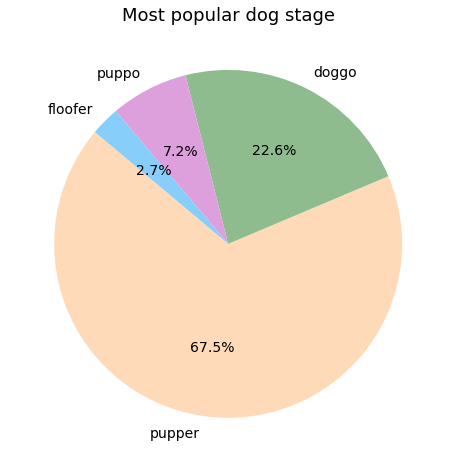

In [209]:
#visual representation
labels = 'pupper', 'doggo', 'puppo', 'floofer'
sizes = [(df_all.dog_stage=='pupper').sum(), (df_all.dog_stage=='doggo').sum(), (df_all.dog_stage=='puppo').sum(), (df_all.dog_stage=='floofer').sum()]
colors = ['peachpuff', 'darkseagreen', 'plum', 'lightskyblue']

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
ax.set_title('Most popular dog stage', fontsize=18)
plt.show()